### Explore Bike Share Data

For this project, your goal is to ask and answer three questions about the available bikeshare data from Washington, Chicago, and New York.  This notebook can be submitted directly through the workspace when you are confident in your results.

You will be graded against the project [Rubric](https://review.udacity.com/#!/rubrics/2508/view) by a mentor after you have submitted.  To get you started, you can use the template below, but feel free to be creative in your solutions!

In [165]:
## Loading datasets
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [166]:
# New York
print(dim(ny))
head(ny)

[1] 54770     9


X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [167]:
# Washington, D.C.
print(dim(wash))
head(wash)

[1] 89051     7


X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [168]:
# Chicago
print(dim(chi))
head(chi)

[1] 8630    9


X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


### Question 1


**What are the average travel time of users in the three cities?**

In [169]:
# Load the ggplot libary
library(ggplot2)

To study this question, I first printed out the summary of the statistics of the trip duration (`Trip.Duration`) of all 3 cities.

In [170]:
# Summary of NYC
print("New York")
summary(ny$Trip.Duration)

# Summary of Washington
print("Washington")
summary(wash$Trip.Duration)

# Summary of Chicago
print("Chicago")
summary(chi$Trip.Duration)

[1] "New York"


     Min.   1st Qu.    Median      Mean   3rd Qu.      Max.      NA's 
     61.0     368.0     610.0     903.6    1051.0 1088634.0         1 

[1] "Washington"


    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
    60.3    410.9    707.0   1234.0   1233.2 904591.4        1 

[1] "Chicago"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   394.2   670.0   937.2  1119.0 85408.0 

**Finding:** The mean of the trip durations is 903.6 seconds in NYC, 1,234 seconds in Washington, and 937.2 seconds in Chicago.

**However**, I noticed that there're outliers in the data. For example, the maximum trip duration in NYC is found to be 1,088,634 seconds. This is almost about 12.5 days long. This could be an event where an system error occurred, the user forgot to return the bike, or the bike was lost.

The mean of the trip durations might come from the contribution of the outliers. The outliers need to be removed so that we can have a more reliable statistics.

To visualize the outliers, I used the boxplots.

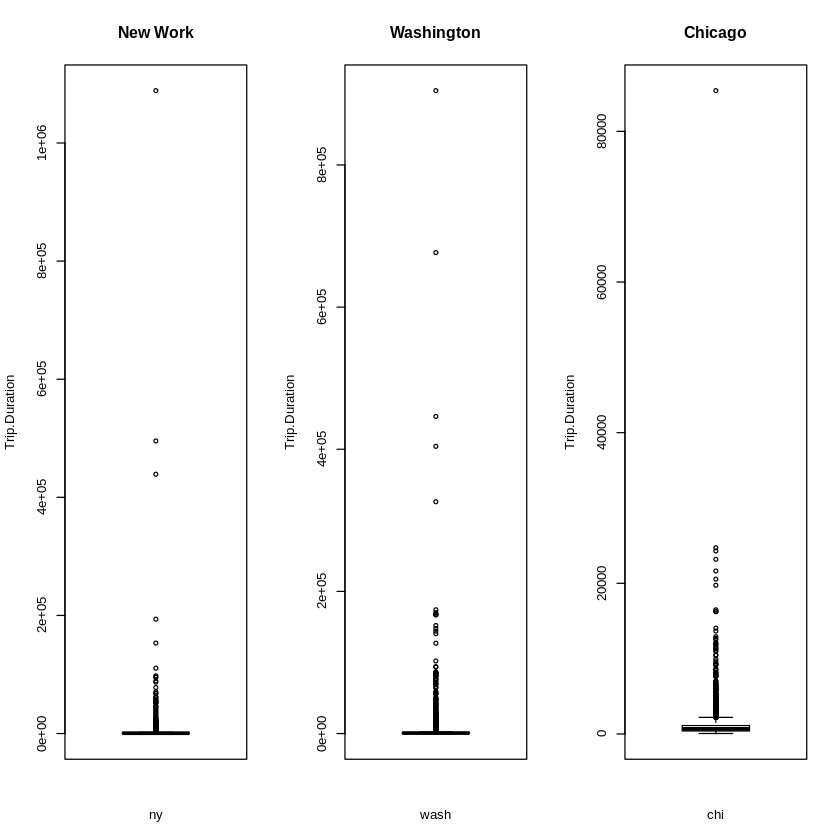

In [171]:
# Plot the box plots
par(mfrow=c(1, 3))
boxplot(ny$Trip.Duration, main="New Work", xlab="ny", ylab="Trip.Duration")
boxplot(wash$Trip.Duration, main="Washington", xlab="wash", ylab="Trip.Duration")
boxplot(chi$Trip.Duration, main="Chicago", xlab="chi", ylab="Trip.Duration")

I decided to removed the outliers that are too large for the reasons mentioned above.

To identify the outliers, I calculated the Q3 quantile and the IQR. The outliers that are greater than **Q3+1.5\*IQR** will be remove. (In other words, durations smaller than this value will be kept)

In [172]:
# Calculate Q1 and Q3
ny.Q = quantile(ny$Trip.Duration, probs=c(0.75), na.rm=TRUE)
wash.Q = quantile(wash$Trip.Duration, probs=c(0.75), na.rm=TRUE)
chi.Q = quantile(chi$Trip.Duration, probs=c(0.75), na.rm=TRUE)

# Calculate IQR
ny.IQR = IQR(ny$Trip.Duration, 'na.rm'=TRUE)
wash.IQR = IQR(wash$Trip.Duration, 'na.rm'=TRUE)
chi.IQR = IQR(chi$Trip.Duration, 'na.rm'=TRUE)

# Lower bounds for the outliers
ny.lower = ny.Q[1] + 1.5*ny.IQR
wash.lower = wash.Q[1] + 1.5*wash.IQR
chi.lower = chi.Q[1] + 1.5*chi.IQR

# Eliminate outliers
ny_clean = subset(ny, (ny$Trip.Duration<ny.lower))
wash_clean = subset(wash, (wash$Trip.Duration<wash.lower))
chi_clean = subset(chi, (chi$Trip.Duration<chi.lower))

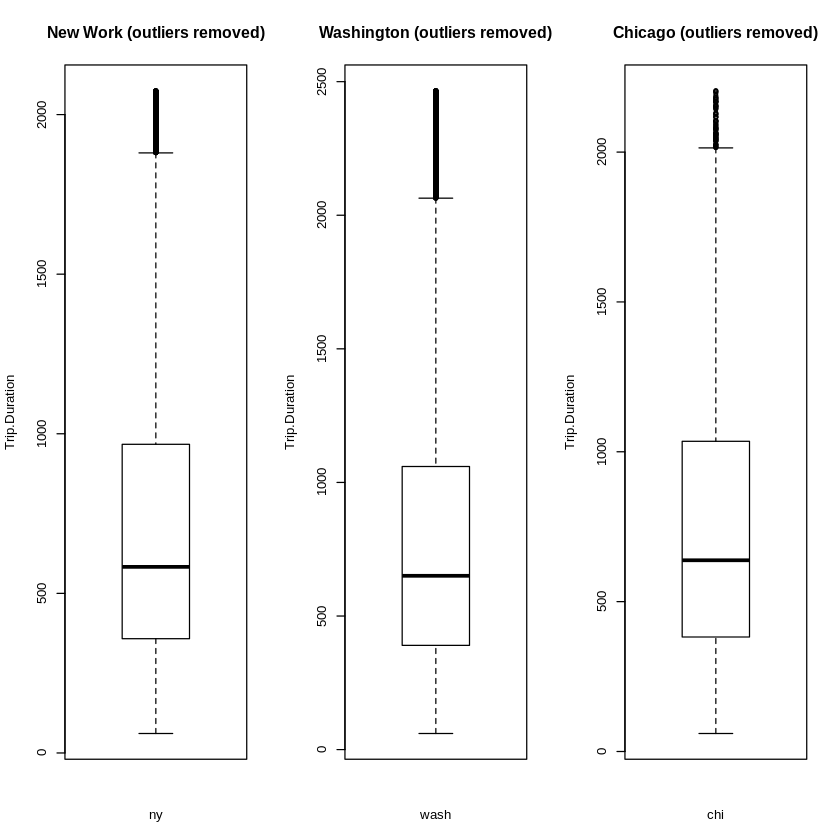

In [184]:
# Plot the box plots again
par(mfrow=c(1, 3))
boxplot(ny_clean$Trip.Duration, main="New Work (outliers removed)", xlab="ny", ylab="Trip.Duration")
boxplot(wash_clean$Trip.Duration, main="Washington (outliers removed)", xlab="wash", ylab="Trip.Duration")
boxplot(chi_clean$Trip.Duration, main="Chicago (outliers removed)", xlab="chi", ylab="Trip.Duration")

The mean of the trip duration can then be re-calculated.

In [174]:
# Summary of NYC
print("New York (outliers removed)")
summary(ny_clean$Trip.Duration)

# Summary of Washington
print("Washington (outliers removed)")
summary(wash_clean$Trip.Duration)

# Summary of Chicago
print("Chicago (outliers removed)")
summary(chi_clean$Trip.Duration)

[1] "New York (outliers removed)"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   61.0   358.0   583.0   708.9   967.0  2075.0 

[1] "Washington (outliers removed)"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
  60.27  390.14  650.46  778.47 1059.71 2466.35 

[1] "Chicago (outliers removed)"


   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
   60.0   382.0   638.0   746.3  1035.0  2205.0 

The mean trip duration in New York decreased from 903.6 to 708.9

The mean trip duration in Wasington decreased from 1,234 to 778.47

The mean trip duration in Chicago decreased from 937.2 to 746.3

The trip durations in all 3 cities range from about 60 to about 2500.

All units here are in seconds (sec).

A simple t-test is applied here to see if the means of trip duration between these cities are statistically different.

In [175]:
# T-test between NYC and Washington
t.test(ny_clean$Trip.Duration, wash_clean$Trip.Duration)

# T-test between NYC and Chicago
t.test(ny_clean$Trip.Duration, chi_clean$Trip.Duration)

# T-test between Washington and Chicago
t.test(wash_clean$Trip.Duration, chi_clean$Trip.Duration)


	Welch Two Sample t-test

data:  ny_clean$Trip.Duration and wash_clean$Trip.Duration
t = -26.359, df = 118590, p-value < 2.2e-16
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -74.75074 -64.40375
sample estimates:
mean of x mean of y 
 708.8927  778.4700 



	Welch Two Sample t-test

data:  ny_clean$Trip.Duration and chi_clean$Trip.Duration
t = -6.8935, df = 10899, p-value = 5.744e-12
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 -48.05899 -26.77877
sample estimates:
mean of x mean of y 
 708.8927  746.3116 



	Welch Two Sample t-test

data:  wash_clean$Trip.Duration and chi_clean$Trip.Duration
t = 6.0188, df = 10255, p-value = 1.817e-09
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
 21.68508 42.63164
sample estimates:
mean of x mean of y 
 778.4700  746.3116 


Lastly, the histograms are plotted below:

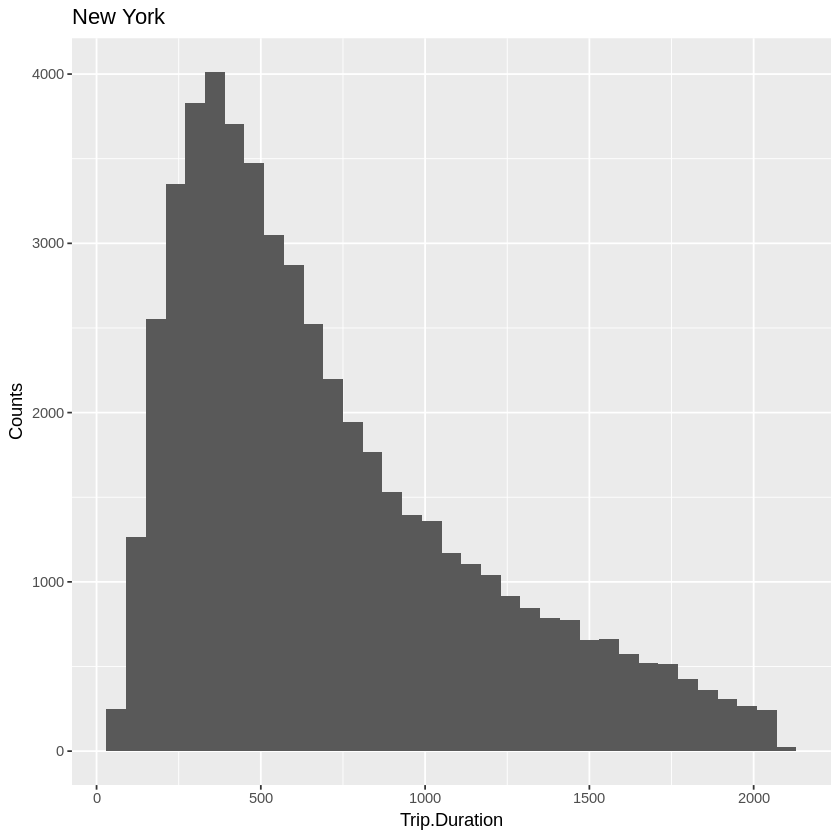

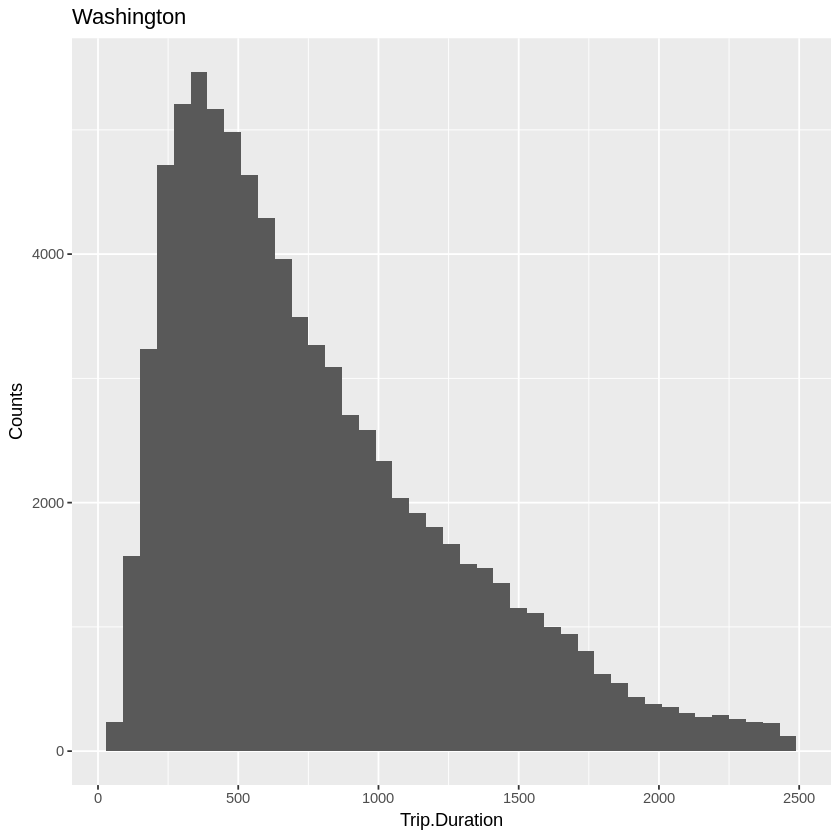

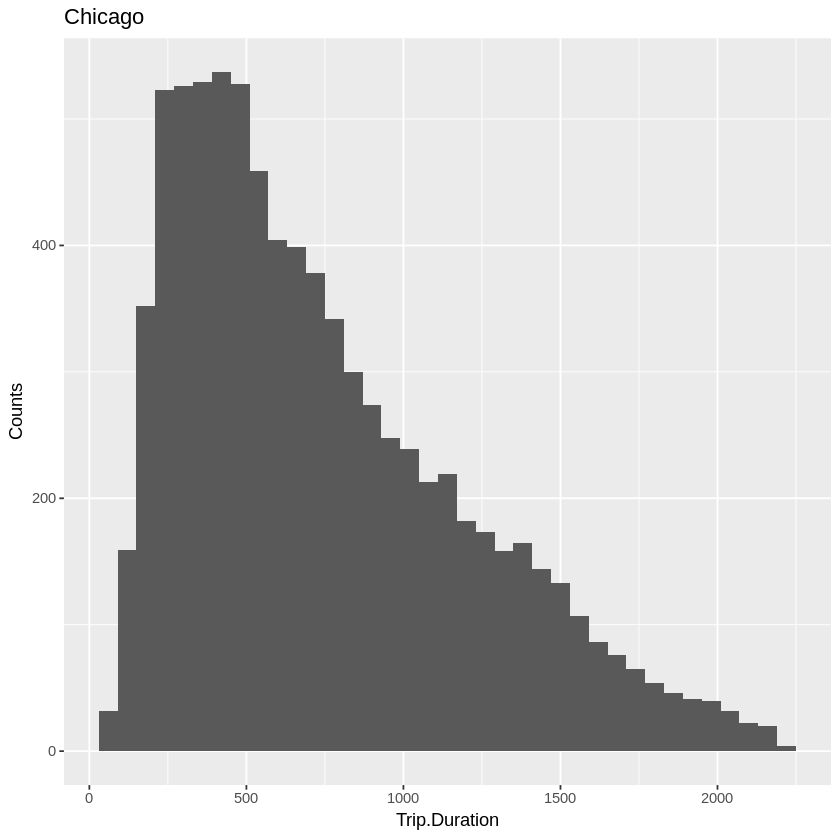

In [176]:
# Plot the histograms
# NYC
qplot(ny_clean$Trip.Duration, binwidth=60,
      main="New York", xlab="Trip.Duration", ylab="Counts")
# Washington
qplot(wash_clean$Trip.Duration, binwidth=60,
      main="Washington", xlab="Trip.Duration", ylab="Counts")
# Chicago
qplot(chi_clean$Trip.Duration, binwidth=60,
      main="Chicago", xlab="Trip.Duration", ylab="Counts")

**Summary of your question 1 results goes here.**

**Summary**

1. The mean trip duration is:
    - 708.9 secs (~11.8 mins) in New York
    - 778.47 secs (~13 mins) in Washington
    - 746.3 secs (~12.4 mins) in Chicago

2. By t-test, the mean trip duration in Washington is greater than in New York and Chicago.

3. Outliers (that are too large) were removed from the data in this analysis.

### Question 2

**Does the mean trip duration depend on the day of the week (or the month)?**

This is the follow-up question. I'm interested in whether the trip duration is different on any specific day or during any specific month.

Note that here I use the data where outliers were removed, as in the previous question.

[1] "Group by day of the week (New York)"


day of week,mean duration
Friday,692.7438
Monday,683.6185
Saturday,756.4638
Sunday,787.8780
Thursday,691.2797
Tuesday,680.1054
Wednesday,700.7922


[1] "Group by month (New York)"


month,mean duration
01,629.9011
02,661.4329
03,638.2909
04,741.0080
05,732.2620
06,749.6838


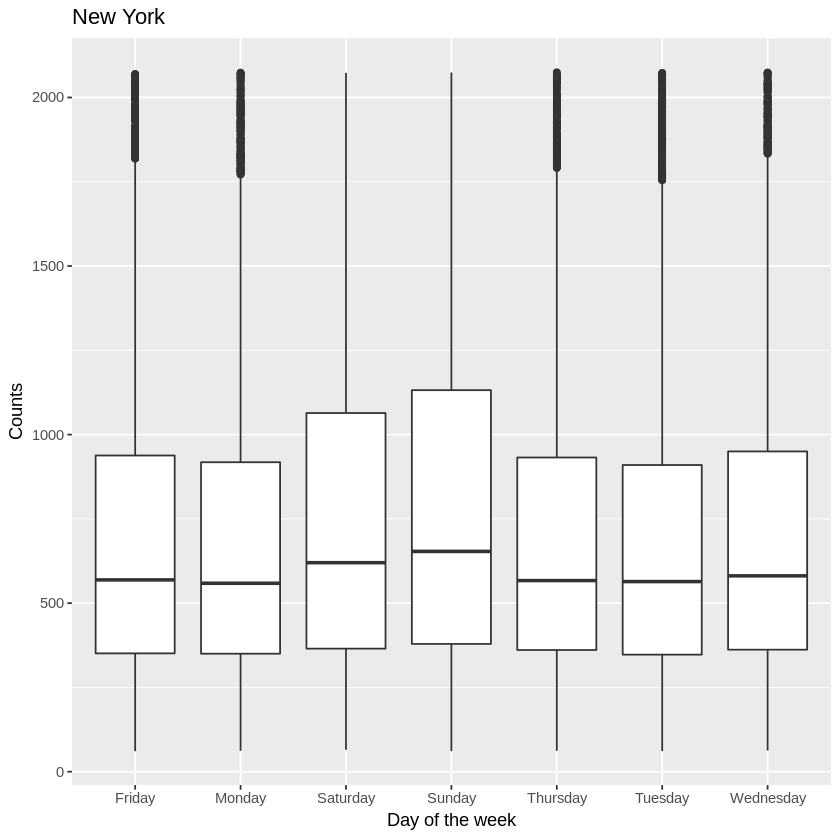

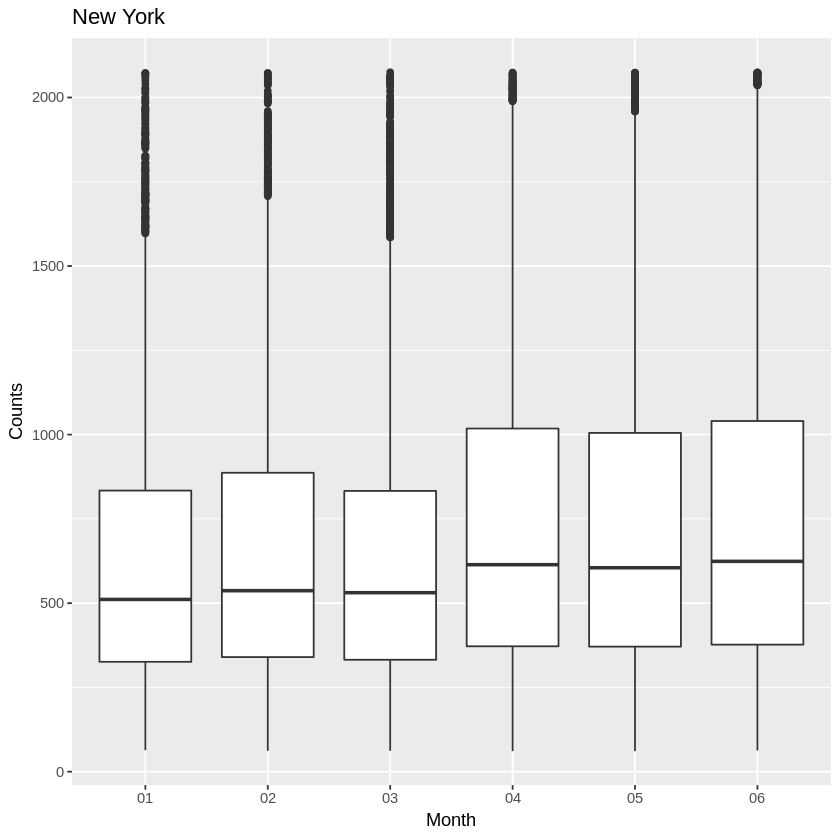

In [177]:
## Analysis of NYC
# group by day of the week
print("Group by day of the week (New York)")
setNames(aggregate(ny_clean$Trip.Duration,
                   by=list(weekdays(as.Date(ny_clean$Start.Time))),
                   mean, na.rm=TRUE),
         c("day of week", "mean duration"))

# group by month
print("Group by month (New York)")
setNames(aggregate(ny_clean$Trip.Duration,
                   by=list(strftime(as.Date(ny_clean$Start.Time), "%m")),
                   mean, na.rm=TRUE),
         c("month", "mean duration"))

# group-by-dow box plot
qplot(weekdays(as.Date(ny_clean$Start.Time)),
      ny_clean$Trip.Duration, geom="boxplot",
      main="New York", xlab="Day of the week", ylab="Counts")

# group-by-month box plot
qplot(x=strftime(as.Date(ny_clean$Start.Time), "%m"),
      y=ny_clean$Trip.Duration, geom="boxplot",
      main="New York", xlab="Month", ylab="Counts")

[1] "Group by day of the week (Washington)"


day of week,mean duration
Friday,752.3017
Monday,754.5007
Saturday,901.0384
Sunday,872.1970
Thursday,728.6577
Tuesday,743.1405
Wednesday,738.1723


[1] "Group by month (Washington)"


month,mean duration
01,673.2939
02,724.9906
03,737.4976
04,833.5178
05,798.7676
06,818.3841


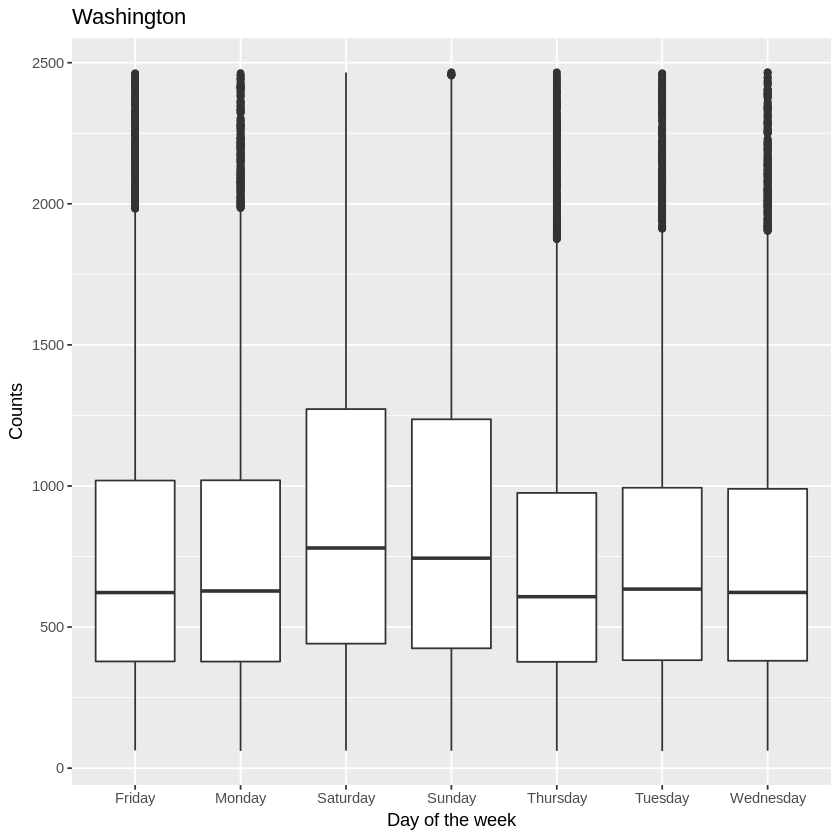

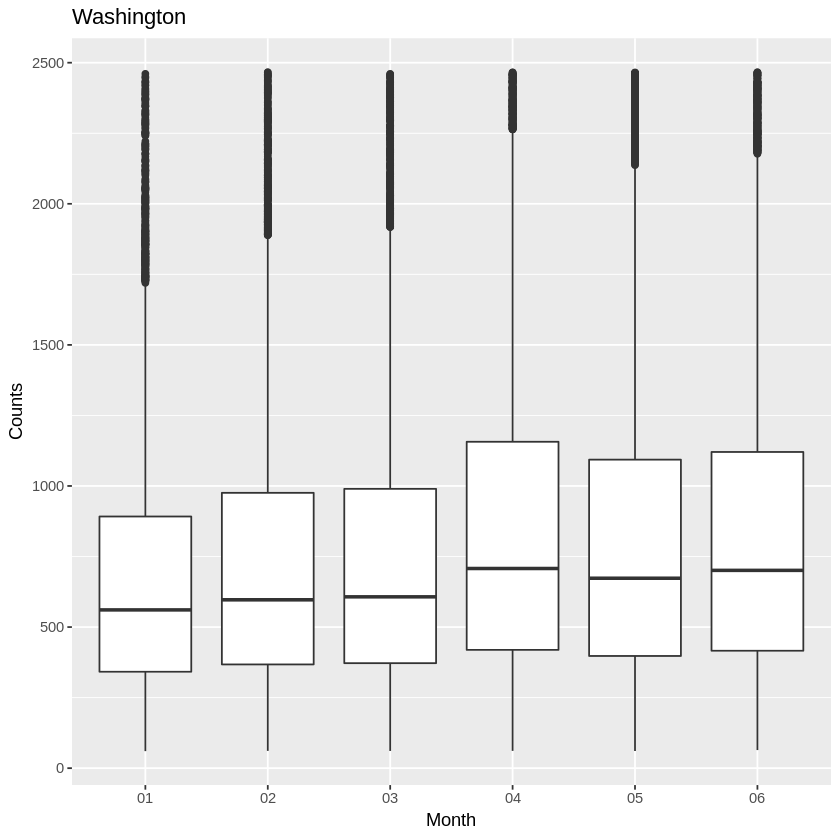

In [178]:
## Analysis of Washington
# group by day of the week
print("Group by day of the week (Washington)")
setNames(aggregate(wash_clean$Trip.Duration,
                   by=list(weekdays(as.Date(wash_clean$Start.Time))),
                   mean, na.rm=TRUE),
         c("day of week", "mean duration"))

# group by month
print("Group by month (Washington)")
setNames(aggregate(wash_clean$Trip.Duration,
                   by=list(strftime(as.Date(wash_clean$Start.Time), "%m")),
                   mean, na.rm=TRUE),
         c("month", "mean duration"))

# group-by-dow box plot
qplot(weekdays(as.Date(wash_clean$Start.Time)),
      wash_clean$Trip.Duration, geom="boxplot",
      main="Washington", xlab="Day of the week", ylab="Counts")

# group-by-month box plot
qplot(x=strftime(as.Date(wash_clean$Start.Time), "%m"),
      y=wash_clean$Trip.Duration, geom="boxplot",
      main="Washington", xlab="Month", ylab="Counts")

[1] "Group by day of the week (Chicago)"


day of week,mean duration
Friday,700.9283
Monday,743.6511
Saturday,884.4976
Sunday,889.6479
Thursday,697.2457
Tuesday,691.3443
Wednesday,668.0866


[1] "Group by month (Chicago)"


month,mean duration
01,609.3906
02,663.3355
03,619.5114
04,752.0275
05,781.1268
06,818.8426


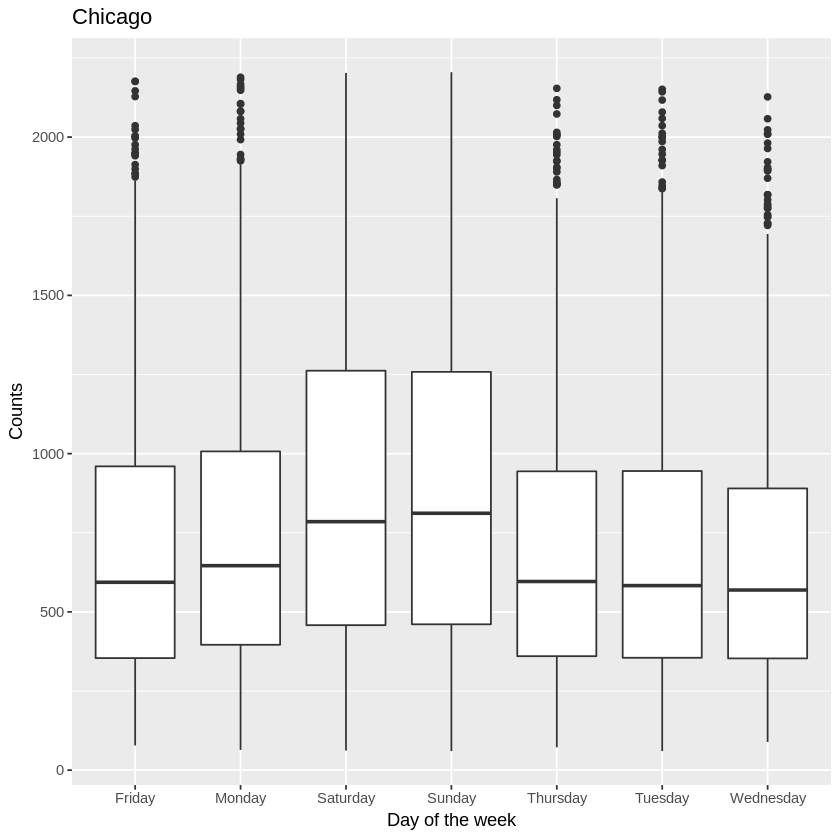

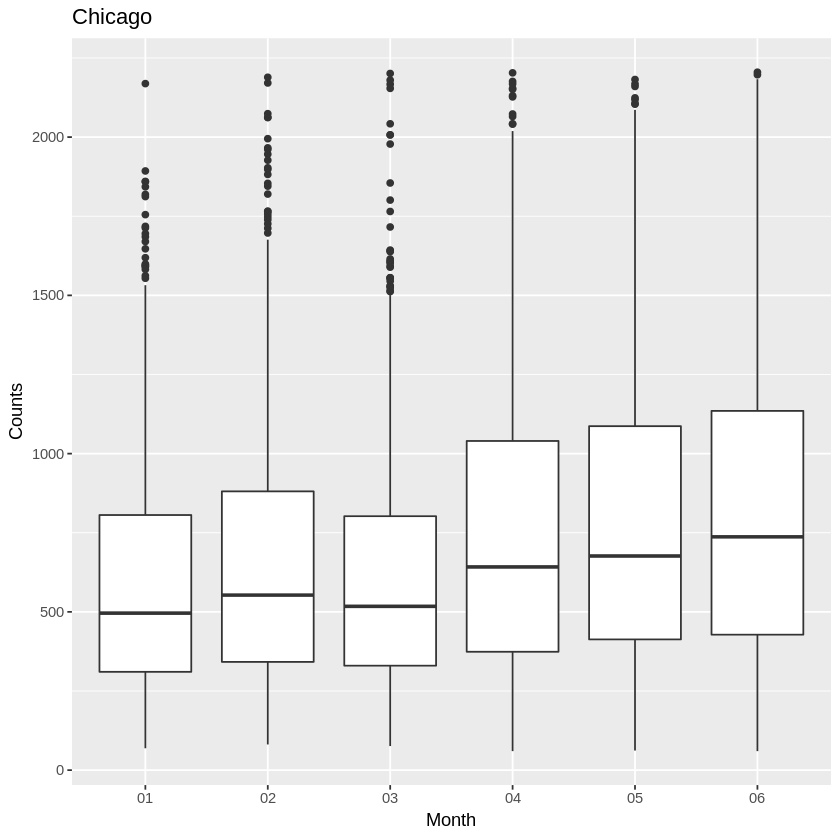

In [179]:
## Analysis of Chicago
# group by day of the week
print("Group by day of the week (Chicago)")
setNames(aggregate(chi_clean$Trip.Duration,
                   by=list(weekdays(as.Date(chi_clean$Start.Time))),
                   mean, na.rm=TRUE),
         c("day of week", "mean duration"))

# group by month
print("Group by month (Chicago)")
setNames(aggregate(chi_clean$Trip.Duration,
                   by=list(strftime(as.Date(chi_clean$Start.Time), "%m")),
                   mean, na.rm=TRUE),
         c("month", "mean duration"))

# group-by-dow box plot
qplot(weekdays(as.Date(chi_clean$Start.Time)),
      chi_clean$Trip.Duration, geom="boxplot",
      main="Chicago", xlab="Day of the week", ylab="Counts")

# group-by-month box plot
qplot(x=strftime(as.Date(chi_clean$Start.Time), "%m"),
      y=chi_clean$Trip.Duration, geom="boxplot",
      main="Chicago", xlab="Month", ylab="Counts")

From the tables and the box plots above, it seems that the mean trip duration on Saturday and Sunday is longer than Monday-through-Friday. The reason might be that during weekends, there're more rentals for leisure purposes.

Second, it seems that the mean trip duration during April-June is longer than during January-March. The reason might be that it's warmer during the spring and users are more likely to ride the bike for a longer distance.

**Summary of your question 2 results goes here.**

**Summary**

1. The mean trip duration is longer during weekends (Saturday and Sunday)
2. The mean trip duration is longer during spring (March to June)

### Question 3

**What are the top 3 popular start stations in each city?**

It'll be interesting to list the top 3 popular start stations in these 3 cities. By this analysis, we can know where are the demands.

From the previous question, it seem that the result might be different if it's during weekend or not. Therefore, for each city, the top 3 popular rental station during weekends and during weekdays will be listed separately.

In [180]:
## New York City

# Add a new column named "dow" to store the day of the week
ny_clean$dow = weekdays(as.Date(ny_clean$Start.Time))

## Weekend rentals
# Extract rentals during weekends
ny.weekends = na.omit(subset(ny_clean, (ny_clean$dow=="Saturday") | (ny_clean$dow=="Sunday")))
# Counts the number of Start.Station and sort (decending)
ny.weekends.SScounts = as.data.frame(table(ny.weekends$Start.Station))
ny.weekends.SScounts = ny.weekends.SScounts[order(-ny.weekends.SScounts$Freq),]
# See the top 3 stations (weekend)
print("Top 3 start stations during weekends (New York)")
head(ny.weekends.SScounts, 3)

## Weekdays
# Extract rentals during weekdays
ny.weekdays = na.omit(subset(ny_clean, (ny_clean$dow!="Saturday") & (ny_clean$dow!="Sunday")))
# Counts the number of Start.Station and sort (decending)
ny.weekdays.SScounts = as.data.frame(table(ny.weekdays$Start.Station))
ny.weekdays.SScounts = ny.weekdays.SScounts[order(-ny.weekdays.SScounts$Freq),]
# See the top 3 stations
print("Top 3 start stations during weekdays (New York)")
head(ny.weekdays.SScounts, 3)

[1] "Top 3 start stations during weekends (New York)"


,Var1,Freq
557,W 21 St & 6 Ave,79
231,E 17 St & Broadway,75
625,West St & Chambers St,69


[1] "Top 3 start stations during weekdays (New York)"


,Var1,Freq
467,Pershing Square North,513
113,Broadway & E 22 St,288
557,W 21 St & 6 Ave,283


In [181]:
## Washington

# Add a new column named "dow" to store the day of the week
wash_clean$dow = weekdays(as.Date(wash_clean$Start.Time))

## Weekend rentals
# Extract rentals during weekends
wash.weekends = na.omit(subset(wash_clean, (wash_clean$dow=="Saturday") | (wash_clean$dow=="Sunday")))
# Counts the number of Start.Station and sort (decending)
wash.weekends.SScounts = as.data.frame(table(wash.weekends$Start.Station))
wash.weekends.SScounts = wash.weekends.SScounts[order(-wash.weekends.SScounts$Freq),]
# See the top 3 stations (weekend)
print("Top 3 start stations during weekends (Washington)")
head(wash.weekends.SScounts, 3)

## Weekdays
# Extract rentals during weekdays
wash.weekdays = na.omit(subset(wash_clean, (wash_clean$dow!="Saturday") & (wash_clean$dow!="Sunday")))
# Counts the number of Start.Station and sort (decending)
wash.weekdays.SScounts = as.data.frame(table(wash.weekdays$Start.Station))
wash.weekdays.SScounts = wash.weekdays.SScounts[order(-wash.weekdays.SScounts$Freq),]
# See the top 3 stations
print("Top 3 start stations during weekdays (Washington)")
head(wash.weekdays.SScounts, 3)

[1] "Top 3 start stations during weekends (Washington)"


,Var1,Freq
306,Lincoln Memorial,470
282,Jefferson Dr & 14th St SW,408
283,Jefferson Memorial,335


[1] "Top 3 start stations during weekdays (Washington)"


,Var1,Freq
210,Columbus Circle / Union Station,1462
321,Massachusetts Ave & Dupont Circle NW,877
51,15th & P St NW,712


In [182]:
## Chicago

# Add a new column named "dow" to store the day of the week
chi_clean$dow = weekdays(as.Date(chi_clean$Start.Time))

## Weekend rentals
# Extract rentals during weekends
chi.weekends = na.omit(subset(chi_clean, (chi_clean$dow=="Saturday") | (chi_clean$dow=="Sunday")))
# Counts the number of Start.Station and sort (decending)
chi.weekends.SScounts = as.data.frame(table(chi.weekends$Start.Station))
chi.weekends.SScounts = chi.weekends.SScounts[order(-chi.weekends.SScounts$Freq),]
# See the top 3 stations (weekend)
print("Top 3 start stations during weekends (Chicago)")
head(chi.weekends.SScounts, 3)

## Weekdays
# Extract rentals during weekdays
chi.weekdays = na.omit(subset(chi_clean, (chi_clean$dow!="Saturday") & (chi_clean$dow!="Sunday")))
# Counts the number of Start.Station and sort (decending)
chi.weekdays.SScounts = as.data.frame(table(chi.weekdays$Start.Station))
chi.weekdays.SScounts = chi.weekdays.SScounts[order(-chi.weekdays.SScounts$Freq),]
# See the top 3 stations
print("Top 3 start stations during weekdays (Chicago)")
head(chi.weekdays.SScounts, 3)

[1] "Top 3 start stations during weekends (Chicago)"


,Var1,Freq
422,Streeter Dr & Grand Ave,21
247,Lake Shore Dr & North Blvd,19
87,Clark St & Armitage Ave,17


[1] "Top 3 start stations during weekdays (Chicago)"


,Var1,Freq
119,Clinton St & Washington Blvd,116
66,Canal St & Adams St,94
115,Clinton St & Madison St,87


**Summary of your question 3 results goes here.**

**Summaries**





- Top 3 start stations in New York City are:
    - weekends
        1. W 21 St & 6 Ave
        2. E 17 St & Broadway
        3. West St & Chambers St
    - weekdays
        1. Pershing Square North
        2. Broadway & E 22 St
        3. W 21 St & 6 Ave
        
- Top 3 start stations in Washington are:
    - weekends
        1. Lincoln Memorial
        2. Jefferson Dr & 14th St SW
        3. Jefferson Memorial
    - weekdays
        1. Columbus Circle / Union Station
        2. Massachusetts Ave & Dupont Circle NW
        3. 15th & P St NW
        
- Top 3 start stations in Chicago are:
    - weekends
        1. Streeter Dr & Grand Ave
        2. Lake Shore Dr & North Blvd
        3. Clark St & Armitage Ave
    - weekdays
        1. Clinton St & Washington Blvd
        2. Canal St & Adams St
        3. Clinton St & Madison St

From above, it's clear that popular start stations during weekends are different from during weekdays. 


## Finishing Up

> Congratulations!  You have reached the end of the Explore Bikeshare Data Project. You should be very proud of all you have accomplished!

> **Tip**: Once you are satisfied with your work here, check over your report to make sure that it is satisfies all the areas of the [rubric](https://review.udacity.com/#!/rubrics/2508/view). 


## Directions to Submit

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [183]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')